In [14]:
# Load Libraries
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [15]:
# Generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)


In [16]:
# Split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]


In [17]:
# Network
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
opt = SGD(learning_rate = 0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Train: 0.836, Test: 0.854


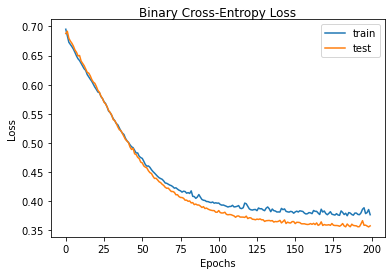

In [19]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.title('Binary Cross-Entropy Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.show()


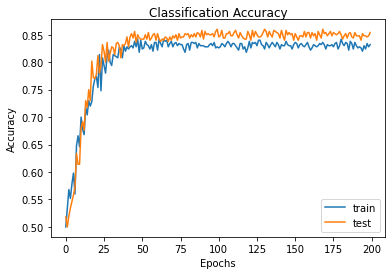

In [20]:
# plot accuracy during training
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.show()

In [21]:
!jupyter nbconvert --to script binary_cross_entropy_loss_classification.ipynb

[NbConvertApp] Converting notebook binary_cross_entropy_loss_classification.ipynb to script
[NbConvertApp] Writing 1816 bytes to binary_cross_entropy_loss_classification.py
